# <font color=green> **Human Resources Data Set**
-----


Dataset:

https://www.kaggle.com/rhuebner/human-resources-data-set

<br>

Possíveis Perguntas:

- o gestor de RH de uma empresa necessita identificar as relações entre a performance de seus colaboradores e quem os lidera.
- Qual é o perfil geral da organização?
- Quais são as melhores fontes de recrutamento?





##  1 - Resumo Geral

In [ ]:
# Importando as Bibliotecas 
import matplotlib.pyplot as plt           # matplotlib
import seaborn as sns                     # seaborn
import pandas as pd
import numpy as np

In [ ]:
df.drop()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2021/Intelie/HRDataset_v14.csv')

In [ ]:
pd.read_excel(,)

In [ ]:
# cabeçalho
df.head(3)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3


In [ ]:
# (linhas, colunas)
df.shape
print(f'Número de registros: {df.shape[0]}, Número de variáveis: {df.shape[1]}')

Número de registros: 311, Número de variáveis: 36


In [ ]:
# colunas e tipo da coluna
df.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 


Temos as seguintes variáveis:

- **Características Gerais dos funcionários**
  - Employee Name e EmpID Employee ID - nomes dos funcionários
  - MarriedID (1- sim, 0-não), MaritalStatusID e MaritalStatusID - estado civil 
  - Gender ID (1 - M, 0 - F) e Sex
  - State
  - Zip
  - CitizenDesc
  - HispanicLatino
  - RaceDesc

<br>

- **Datas:**
  - DOB: Date of Birth
  - DateofHire
  - DateofTermination
  - LastPerformanceReviewDate

<br>

- **Perfil da Empresa/funcionário:**
  - EmpStatusID, EmploymentStatus, Termd - funcionário ativo ou inativo
  - TermReason
  - DeptID Department e Department - nome do departamento
  - FromDiversityJobFairID:	Was the employee sourced from the Diversity job fair?
  - Salary
  - PositionID e Position - posição do funcionário na empresa
  - EmploymentStatus
  - ManagerName e ManagerID
  - RecruitmentSource

<br>

- **Métricas de avaliação:**
  - PerfScoreID e PerformanceScore: (Fully Meets, Partially Meets, PIP, Exceeds)
  - EngagementSurvey - External Partner
  - EmpSatisfaction - in company
  - SpecialProjectsCount
  - DaysLateLast30
  - Absences


## 2- Correção de erros

- **CORREÇÃO 1** 

Com as datas,foram criadas duas colunas:

  1. **'age_hire'**: Idade quando contratado;
  2. **'time_company'**: Tempo de empresa (considerando a data da última avaliação no caso de *terminated* ou última revisão no caso de *ativo*)


In [ ]:
# Datas: 'DOB': date of birth, 'date of Hire', 'Date of termination','LastPerformanceReviewDate'
columns_date = ['DOB','DateofHire','DateofTermination','LastPerformanceReview_Date']

# 'DOB' - correção pois está no formato m/d/xx -> passando para m/d/xxxx
df['DOB'] = df['DOB'].apply(lambda x: x.split('/')[0] +'/'+ x.split('/')[1]+'/'+'19' + x.split('/')[-1])  # colocar no formato 19XX

# date of birth, 'date of Hire', 'Date of termination','LastPerformanceReviewDate'
columns_date = ['DOB','DateofHire','DateofTermination','LastPerformanceReview_Date']
for date in columns_date:
  df[date] = pd.to_datetime(df[date], format='%m/%d/%Y')  # passando para o formato data

df[columns_date].head(3)

,DOB,DateofHire,DateofTermination,LastPerformanceReview_Date
0,1983-07-10,2011-07-05,NaT,2019-01-17
1,1975-05-05,2015-03-30,2016-06-16,2016-02-24
2,1988-09-19,2011-07-05,2012-09-24,2012-05-15


In [ ]:
# criando a coluna idade quando contratado:
age_hire = df['DateofHire'] - df['DOB']
df['age_hire'] = (age_hire/pd.Timedelta(days=365)).apply(int)


# criando a coluna tempo de empresa (considerando a data da última avaliação no caso de terminated ou última revisão no caso de ativo)
df['time_company'] = np.where(df['EmploymentStatus'] == 'Active', (df['LastPerformanceReview_Date']-df['DateofHire'])/pd.Timedelta(days=365),(df['DateofTermination']-df['DateofHire'])/pd.Timedelta(days=365))
df['time_company'] = df['time_company'].apply(lambda x: round(x,2))

- **CORREÇÃO 2** 

Correção de ManagerID:

  - Manager com mais de um ID (que parece ser classificação errada) e dado faltando. Por isso, fiz uma nova coluna ID ('ManagerName_ID2') para não ter que usar o nome e não usar o ManagerID que parece estar inconsistente.

In [ ]:
# ManagerID  - não to confiando muito nessas informações de Manager ID. Tem Manager com mais de um ID (que parece ser classificação errada) e dado faltando. Fazer minha própria coluna ID
df[['ManagerName', 'ManagerID']].value_counts().sort_index()

ManagerName         ManagerID
Alex Sweetwater     10.0          9
Amy Dunn            11.0         21
Board of Directors  9.0           2
Brandon R. LeBlanc  1.0           6
                    3.0           1
Brannon Miller      12.0         22
Brian Champaigne    13.0          8
David Stanley       14.0         21
Debra Houlihan      15.0          3
Elijiah Gray        16.0         22
Eric Dougall        6.0           4
Janet King          2.0          19
Jennifer Zamora     5.0           7
John Smith          17.0         14
Kelley Spirea       18.0         22
Ketsia Liebig       19.0         21
Kissy Sullivan      20.0         22
Lynn Daneault       21.0         13
Michael Albert      22.0         21
                    30.0          1
Peter Monroe        7.0          14
Simon Roup          4.0          17
Webster Butler      39.0         13
dtype: int64

In [ ]:
# criando a coluna 'ManagerName_ID2': 
df['ManagerName_ID2']  = pd.factorize(df['ManagerName'])[0] + 1   # name para fator

# Número de registros sem 'ManagerID':
print(f"Registros ManagerID faltando: {len(df.loc[df['ManagerID'].isnull(),:])}")

print(f"Número de códigos de 'ManagerName_ID2': {len(df['ManagerName_ID2'].unique())}")
print(f"Número de códigos de Manager: {len(df['ManagerName'].unique())}")

Registros ManagerID faltando: 8
Número de códigos de 'ManagerName_ID2': 21
Número de códigos de Manager: 21


- **CORREÇÃO 3** 

Correção de PerfScoreId:

  - Parece que Fully Meets deveria ser 4, não 1. Assim como um termo de código 3,deveria ser 1.Ajustar os valores baeando no Performance Score

In [ ]:
## 'PerfScoreID'
# Inconsistente.
df[['PerfScoreID','PerformanceScore']].value_counts().sort_index()

PerfScoreID  PerformanceScore 
1            Fully Meets            1
             PIP                   12
2            Needs Improvement     18
3            Fully Meets          242
             PIP                    1
4            Exceeds               37
dtype: int64

In [ ]:
categorias = pd.DataFrame({'Exceeds':4,'Fully Meets':3,'Needs Improvement':2,'PIP':1},index=[0]).T  #criando dataframe com categorias corretas
df['PerfScoreID'] = df['PerformanceScore'].map(categorias[0])  # ajeitar 'PerfScoreID'

# checando o resultado:
df[['PerfScoreID','PerformanceScore']].value_counts()

PerfScoreID  PerformanceScore 
3            Fully Meets          243
4            Exceeds               37
2            Needs Improvement     18
1            PIP                   13
dtype: int64

- **CORREÇÃO 4** 

Remoção de colunas:

  - Para algumas análises a seguir, removi colunas consideradas redundantes, que não adicionam informação ou que percebi inconsistências:

**Não necessárias:**

1. Employee Name
2. EmpID
3. MaritalStatusID


**Inconsistentes:**
1. EmpStatusID
2. DeptID


Por que inconsistente?

In [ ]:
## 'EmpStatusID'
# Teoricamente, era para ser 1,2 e 3 apenas. Os códigos de ativos estão (1,2,3), Terminated for Cause (4) e Voluntarily Terminate (5).
df[['EmpStatusID','EmploymentStatus']].value_counts().sort_index()

EmpStatusID  EmploymentStatus      
1            Active                    182
             Terminated for Cause        2
2            Active                     11
3            Active                     14
4            Terminated for Cause       14
5            Voluntarily Terminated     88
dtype: int64

In [ ]:
## 'DeptID' 
df[['DeptID','Department']].value_counts().sort_index()

DeptID  Department          
1       Admin Offices             9
        Software Engineering      1
2       Executive Office          1
3       IT/IS                    50
4       Software Engineering     10
5       Production              208
6       Production                1
        Sales                    31
dtype: int64

In [ ]:
# Removendo colunas mencionadas:
colunas_remover = ['Employee_Name', 'EmpID','MaritalStatusID','EmpStatusID','DeptID']
df1 = df.drop(colunas_remover, axis=1)
df1.head(2)

,MarriedID,GenderID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,age_hire,time_company,ManagerName_ID2
0,0,1,4,0,62506,0,19,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,No,White,2011-07-05,NaT,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1,28,7.54,1
1,1,1,3,0,104437,1,27,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17,39,1.22,2


In [ ]:
df1.shape

(311, 34)

- **CORREÇÃO 5**

Algumas palavras estão com espaço vazio no final, por exemplo:

- 'Data Analyst ' and 'Data Analyst'
- Department



In [ ]:
df1['Department'].unique()

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

In [ ]:
# colunas que são tipo string
df1.dtypes
df1.columns[df1.dtypes == 'object'].values

array(['Position', 'State', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'HispanicLatino', 'RaceDesc', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'RecruitmentSource',
       'PerformanceScore'], dtype=object)

In [ ]:
# corrigindo o formato dessas colunas
for coluna in df1.columns[df1.dtypes == 'object'].values:  # para todas colunas que são string
  df1[coluna] = df1[coluna].str.rstrip()   # remove espaço vazio no final

In [ ]:
df1['Department'].unique()

array(['Production', 'IT/IS', 'Software Engineering', 'Admin Offices',
       'Sales', 'Executive Office'], dtype=object)

## 3 - Análises

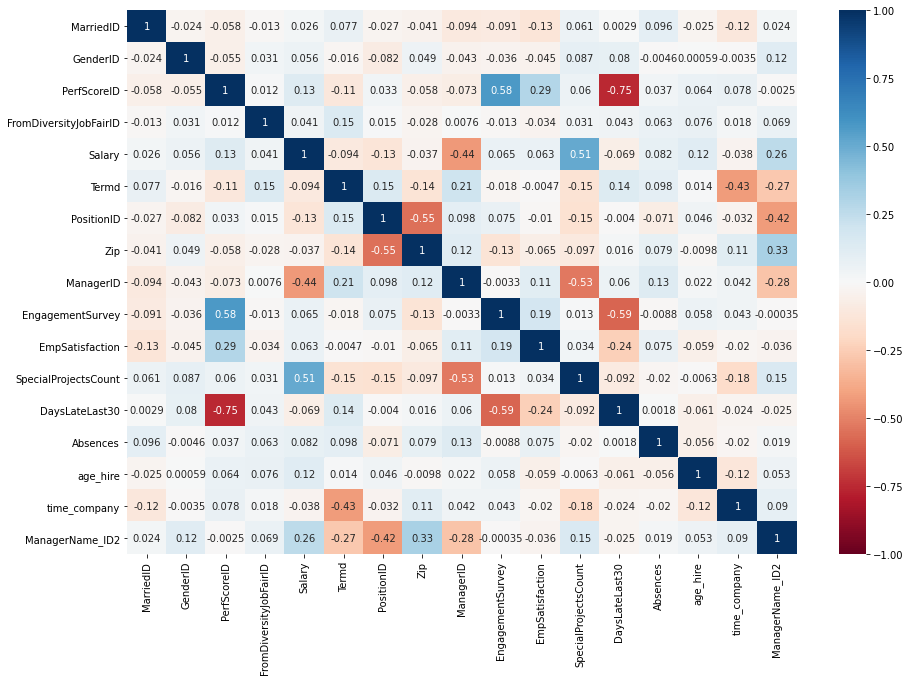

In [ ]:
# Como as variáveis numéricas estão correlacionas?
plt.figure(figsize=(15,10))       # tamanho da figura
sns.heatmap(df1.corr(),cmap = "RdBu", vmin= -1, annot = True)

Observações interessantes do heatmap:

Correlação entre:

- **PerfScoreID x DaysLate30: -0.75**

Valor alto e negativo, indicando que existe uma **grande relação inversa** entre a nota do funcionário e a quantidadede de dias atrasados. O que é esperado. O desempenho do funcionário é também medido pela a assiduidade.

<br>

- **PerfScoreID x EngagementSurvey: 0.58**

Valor moderado/alto, indicando que existe uma relação direta entre a nota do funcionário e a pesquisas de funcionários. O funcionário que está motivado irá provavelmente fornecer uma nota alta na pesquisa de avaliação de empresa. Esta é uma avaliação externa. A correlação da pesquisa de satisfação com a empresa externa foi maior que a da pesquisa interna da empresa (EmpSatisfaction).  

<br>

- **PerfScoreID x EmpSatisfaction: 0.29**

Valor moderado/baixo, indicando que existe uma certa relação direta entre a nota do funcionário e a satisfação com a empresa. O funcionário que está motivado irá provavelmente fornecer uma nota alta na pesquisa de avaliação de empresa. 

<br>

- **Salary x Special Project Count: 0.51**

Valor moderado, indicando que existe uma relação direta entre o salário e o número de projetos especiais que o funcionário trabalhou nos últimos 6 meses.

<br>

- **Termd x time_company: -0.43**

Valor moderado, indicando que existe uma relação inversa entre ser mandado embora e o tempo de empresa. Quanto mais tempo de empresa, menos chances de sair.

<br>

- **EngagementSurvey x DaysLateLast30: -0.59**

Valor moderado/alto, indicando que existe uma relação inversa entre ser a pesquisa de engagamento e o número de dias atrasados. Quanto menos dias atrasado, maior a nota de satisfação da empresa.

<br>

- **EmpSatisfaction x DaysLateLast30: -0.24**

Valor moderado/baixo, indicando que existe uma pequena relação inversa entre ser a pesquisa de satisfação e o número de dias atrasados.




### 3.1 - Perfil Geral dos funcionários:

Variáveis consideradas:

  - Employee Name e EmpID Employee ID - nomes dos funcionários
  - MarriedID (1- sim, 0-não), MaritalStatusID e MaritalStatusID - estado civil
  - Gender ID (1 - M, 0 - F) e Sex
  - State
  - CitizenDesc
  - HispanicLatino
  - RaceDesc

In [ ]:
# Corrigir a coluna HispanicLatino pois está inconsistente (No, no, Yes, yes)
df['HispanicLatino'] = df['HispanicLatino'].apply(lambda x: 'No' if 'o' in x else 'Yes')

Número de funcionários Hispanico-latinos de acordo com o status atual do empregado (ativo, demissão por justa causa, demissão voluntária):

In [ ]:
# número de funcionários HispanicLatinos
pd.DataFrame(df[['HispanicLatino','EmploymentStatus']].value_counts().sort_index(), columns = ['value'])

value
HispanicLatino EmploymentStatus             
No             Active                    188
               Terminated for Cause       15
               Voluntarily Terminated     80
Yes            Active                     19
               Terminated for Cause        1
               Voluntarily Terminated      8

Número de funcionários de acordo com a  declaração de cor:

In [ ]:
# 'RaceDesc'
pd.DataFrame(df[['RaceDesc']].value_counts(), columns = ['valor'])

,valor
RaceDesc,
White,187
Black or African American,80
Asian,29
Two or more races,11
American Indian or Alaska Native,3
Hispanic,1


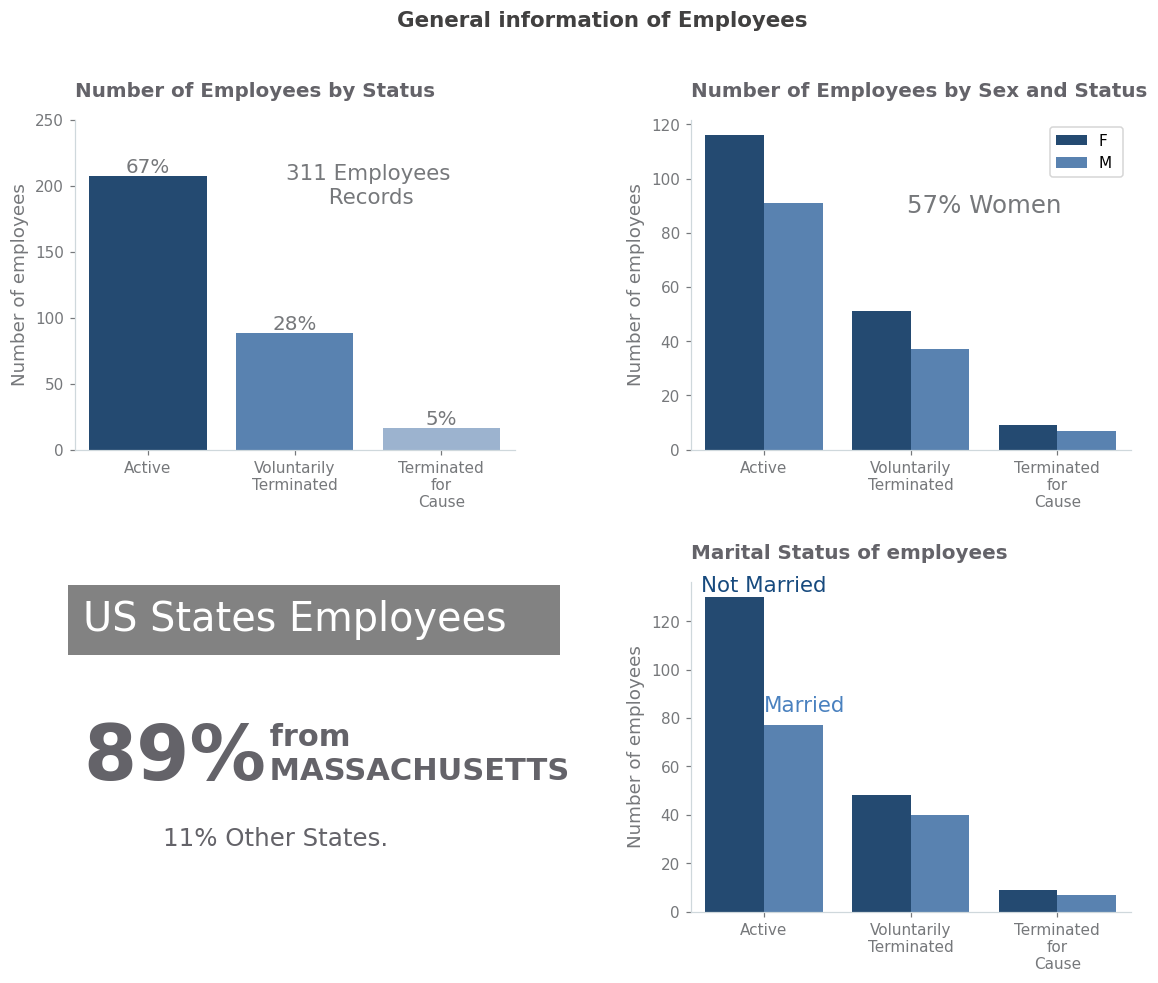

In [ ]:
# Fazer 4 gráficos que resumem as informações de número de funcionários, sexo, Estado e estado civil


pos = [[0,0],[0,1],[1,0],[1,1]]   # posições dos gráficos
palette1 = ['#174A7E','#4A81BF','#94B2D7','#94AFC5','#03045e']  # paleta de cores usada

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(12,9),       # (largura, altura) em polegadas 
                       dpi=110)                                   # resolução (pontos/polegada)

fig.suptitle('General information of Employees', fontsize=14,y= 1.01,weight = 'bold', color = '#414040')

## Figura 1- Quantidade de funcionários pelo status ativo, Voluntary Terminated e Terminated for cause

## informação:
d1 = pd.DataFrame(df1['EmploymentStatus'].value_counts())
d1['porcentagem'] = round(100*d1['EmploymentStatus']/d1['EmploymentStatus'].sum(),0).astype(int)
new_indices = [line.replace(' ','\n') for line in d1.index]

## gráfico
sns.barplot(x=d1.index, y='EmploymentStatus',  palette = palette1,data = d1,ax = ax[0,0])
ax[0,0].set_ylabel('Number of employees',color='#76787B',fontsize=12)
ax[0,0].axis(ymin=0,ymax=250)
for i in range(len(d1)):
  ax[0,0].text(i,d1['EmploymentStatus'][i],str(d1['porcentagem'][i])+'%', fontsize=13, color='#76787B',verticalalignment='bottom',horizontalalignment='center') 
ax[0,0].set_title('Number of Employees by Status', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')
ax[0,0].set_xticklabels(new_indices)
ax[0,0].text(1.5,200, str(len(df1)) + ' Employees\n Records' , fontsize=14, color='#76787B',verticalalignment='center',horizontalalignment='center') 


##===============
## Figura 2- Quantidade de funcionários pelo status ativo, Voluntary Terminated e Terminated for cause

## informação:
d2 = pd.DataFrame(df[['Sex','EmploymentStatus']].value_counts().sort_index(), columns= ['valor'])
d2 = d2.sort_values("valor",ascending=False)

## gráfico
sns.barplot(y=d2['valor'].values, x=d2.index.get_level_values(1).values,hue=d2.index.get_level_values(0).values,palette = palette1, data = d2,ax = ax[0,1])
ax[0,1].set_ylabel('Number of employees',color='#76787B',fontsize=12)
# for i in range(len(d1)):
#   ax[0,1].text(i,d1['EmploymentStatus'][i],str(d1['porcentagem'][i])+'%', fontsize=13, color='#76787B',verticalalignment='bottom',horizontalalignment='center') 
ax[0,1].set_title('Number of Employees by Sex and Status', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')
ax[0,1].set_xticklabels(new_indices)
ax[0,1].text(1.5,90, str(int(round(100*d2.query('Sex == "F"').sum()/d2.sum(),0))) +'%' + ' Women', fontsize=16, color='#76787B',verticalalignment='center',horizontalalignment='center') 


##===============
## Figura 3- Localização da empresa

## informação:
valor = int(round(100* pd.DataFrame(df1['State'].value_counts()).loc['MA'][0]/len(df1),0))   # porcentagem de Massachusetts
state = 'MASSACHUSETTS'

## gráfico
ax[1,0].text(0.02, 0.85,
         'US States Employees   ',   # texto que queremos
         fontsize=26,     # tamanho do texto
         color='white',   # cor do texto
         # Colocando um retangulo de cor envolta do texto - para dar destaque ao título
         bbox={'facecolor': '#828282', 'pad': 10, 'edgecolor': 'none'})

ax[1,0].text(0.02, 0.40,
          str(valor)+'%',
         fontsize=50,
         color='#646369',weight='bold')

ax[1,0].text(0.42, 0.40,
          ' from\n '+ state,
         fontsize=20,
         color='#646369',weight='bold')

ax[1,0].text(0.2, 0.20,
          str(100-valor) + '% Other States.',
         fontsize=16,
         color='#646369')


##===============
## Figura 4 - Quantidade de casados e não casados

## informação:
d4 = pd.DataFrame(df[['MarriedID','EmploymentStatus']].value_counts().sort_index(), columns= ['valor'])
d4 = d4.sort_values("valor",ascending=False)

# gráfico:
sns.barplot(y=d4['valor'].values, x=d4.index.get_level_values(1).values,hue=d4.index.get_level_values(0).values,palette = palette1, data = d2,ax = ax[1,1])
ax[1,1].set_ylabel('Number of employees',color='#76787B',fontsize=12)
ax[1,1].set_title('Marital Status of employees', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')
ax[1,1].set_xticklabels(new_indices)
ax[1,1].text(0,135, 'Not Married', fontsize=14, color=palette1[0],verticalalignment='center',horizontalalignment='center') 
ax[1,1].text(0,85, 'Married', fontsize=14, color=palette1[1],verticalalignment='center',horizontalalignment='left') 
ax[1,1].legend().set_visible(False)



### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines
  if i == 2:
    ax.axis('off') 


fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


Informações que podemos tirar dos gráficos:

- 67% dos funcionários estão ativos
- Maior parte dos funcionários são mulheres
- A sede da empresa é no estado de Massachusetts, considerando que 89% dos 311 registros são do estado. E o restante está espalhado em outros estados dos Estados Unidos.
- A maior parte dos funcionários não são casados, sendo a maior discrepância entre os funcionários ativos.


### 3.2 - Perfil da Companhia e funcionários

#### Quais as principais departamentos?

In [ ]:
# Department
d1 = pd.DataFrame(df1[['Department','EmploymentStatus']].value_counts(),columns =['values'])
d1

values
Department           EmploymentStatus              
Production           Active                     126
                     Voluntarily Terminated      75
IT/IS                Active                      40
Sales                Active                      26
Production           Terminated for Cause         8
Software Engineering Active                       7
Admin Offices        Active                       7
IT/IS                Voluntarily Terminated       6
                     Terminated for Cause         4
Software Engineering Voluntarily Terminated       3
Sales                Voluntarily Terminated       3
                     Terminated for Cause         2
Software Engineering Terminated for Cause         1
Executive Office     Active                       1
Admin Offices        Voluntarily Terminated       1
                     Terminated for Cause         1

In [ ]:
# total por department:
d1_1 = d1.sum(axis=0, level='Department').sort_index()
d1_1

,values
Department,
Admin Offices,9
Executive Office,1
IT/IS,50
Production,209
Sales,31
Software Engineering,11


In [ ]:
# adicionando a coluna porcentagem em d1
po1 = [int(round(100*d1.loc[d1.index[i],'values']/d1_1.loc[d1.index.get_level_values(0)[i],'values'],0)) for i in range(len(d1))]
d1['porcentagem'] = po1
d1

values  porcentagem
Department           EmploymentStatus                           
Production           Active                     126           60
                     Voluntarily Terminated      75           36
IT/IS                Active                      40           80
Sales                Active                      26           84
Production           Terminated for Cause         8            4
Software Engineering Active                       7           64
Admin Offices        Active                       7           78
IT/IS                Voluntarily Terminated       6           12
                     Terminated for Cause         4            8
Software Engineering Voluntarily Terminated       3           27
Sales                Voluntarily Terminated       3           10
                     Terminated for Cause         2            6
Software Engineering Terminated for Cause         1            9
Executive Office     Active                       1          100
Admin Offices        Voluntarily Terminated       1           11
                     Terminated for Cause         1           11

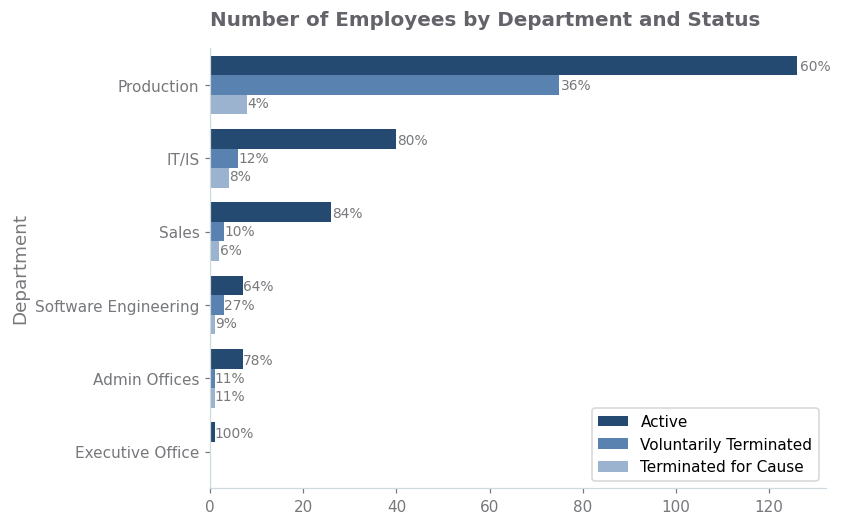

In [ ]:
palette1 = ['#174A7E','#4A81BF','#94B2D7','#94AFC5','#03045e']


fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(7, 5),       # (largura, altura) em polegadas 
                       dpi=110)                                   # resolução (pontos/polegada)

## Figura 1- Department and Employment Status
sns.barplot(x=d1['values'].values, y=d1.index.get_level_values(0).values,hue=d1.index.get_level_values(1).values,palette = palette1, data = d1,ax = ax)
ax.set_ylabel('Department',color='#76787B',fontsize=12)
ax.set_title('Number of Employees by Department and Status', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')
ax.legend(loc = 'lower right')
position = pd.factorize(d1.index.get_level_values(0))[0]
position = [0-0.25, 0, 1-0.25, 2-0.25, 0+0.25, 3-0.25, 4-0.25, 1, 1+0.25, 3, 2, 2+0.25, 3+0.25, 5-0.25, 4, 4+0.25]
for i in range(len(d1)):
  ax.annotate(str(d1['porcentagem'][i])+'%', xy=(d1['values'].values[i]+0.005*d1['values'].values[i],position[i]),fontsize=9, color='#76787B',verticalalignment='center',horizontalalignment='left') 

### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines
  if i == 2:
    ax.axis('off') 

fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.35, 
                    hspace=0.35)

Departamento com maior número de funcionários: **Production**

Grupos que mais saem da empresa (olhando para a porcentagem dos seus respectivos grupos):

- Produção (40%)
- Sof Engineering (36%)
- Admin Office (22%)
- IT/IS (20%)
- Sales (16%)



#### Quais as posições dentro de cada departamento?

In [ ]:
# Department
d2 = pd.DataFrame(df1[['Department','Position']].value_counts().sort_index(),columns =['values'])
d2_1 = d2.sum(axis=0, level='Department').sort_index()
po2 = [int(round(100*d2.loc[d2.index[i],'values']/d2_1.loc[d2.index.get_level_values(0)[i],'values'],0)) for i in range(len(d2))]
d2['porcentagem'] = po2
d2

values  porcentagem
Department           Position                                         
Admin Offices        Accountant I                       3           33
                     Administrative Assistant           3           33
                     Shared Services Manager            1           11
                     Sr. Accountant                     2           22
Executive Office     President & CEO                    1          100
IT/IS                BI Developer                       4            8
                     BI Director                        1            2
                     CIO                                1            2
                     Data Analyst                       8           16
                     Data Architect                     1            2
                     Database Administrator             5           10
                     Enterprise Architect               1            2
                     IT Director                        1            2
                     IT Manager - DB                    2            4
                     IT Manager - Infra                 1            2
                     IT Manager - Support               1            2
                     IT Support                         8           16
                     Network Engineer                   5           10
                     Principal Data Architect           1            2
                     Senior BI Developer                3            6
                     Sr. DBA                            2            4
                     Sr. Network Engineer               5           10
Production           Director of Operations             1            0
                     Production Manager                14            7
                     Production Technician I          137           66
                     Production Technician II          57           27
Sales                Area Sales Manager                27           87
                     Director of Sales                  1            3
                     Sales Manager                      3           10
Software Engineering Software Engineer                 10           91
                     Software Engineering Manager       1            9

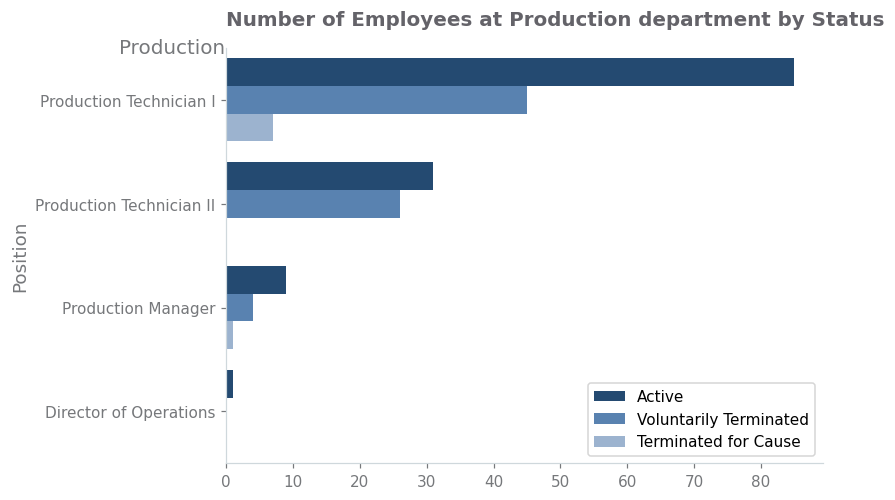

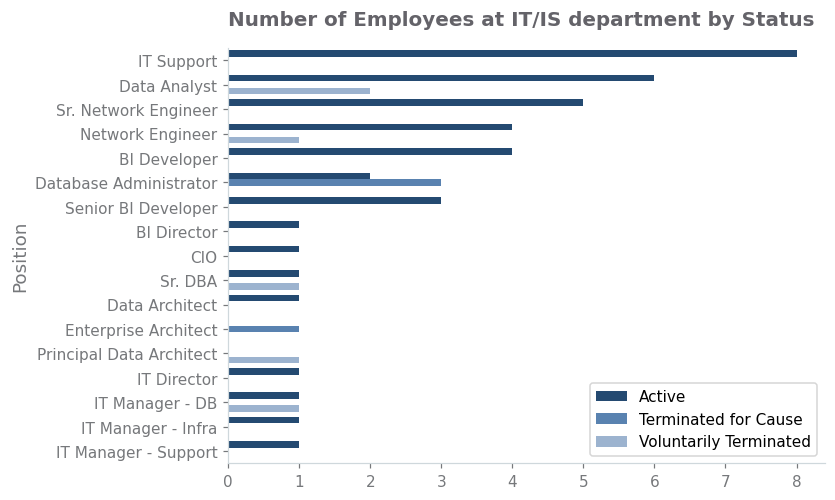

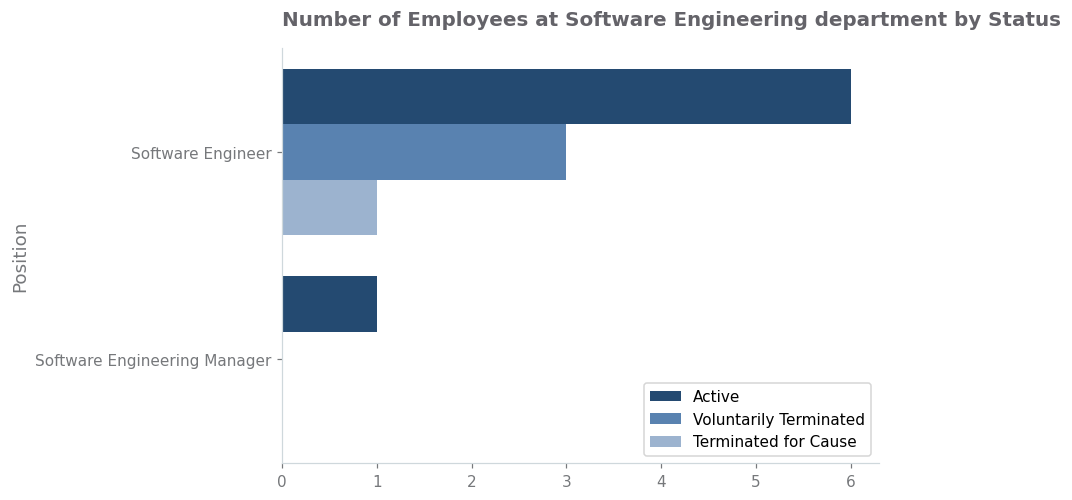

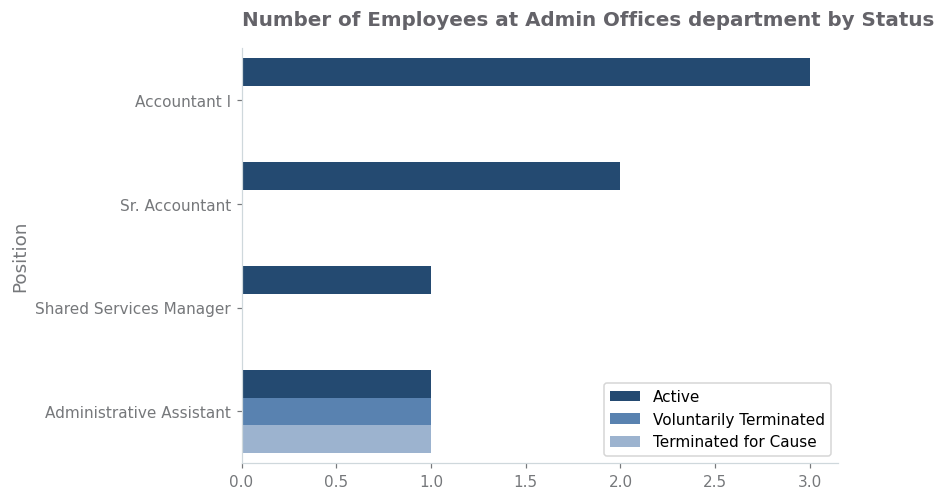

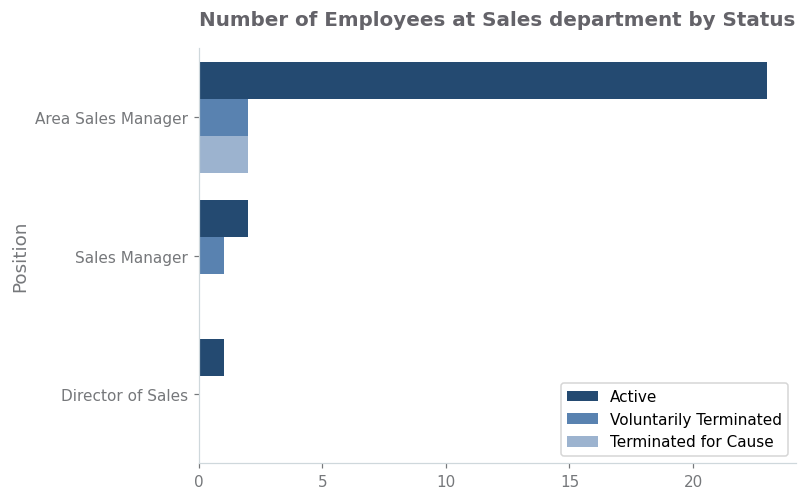

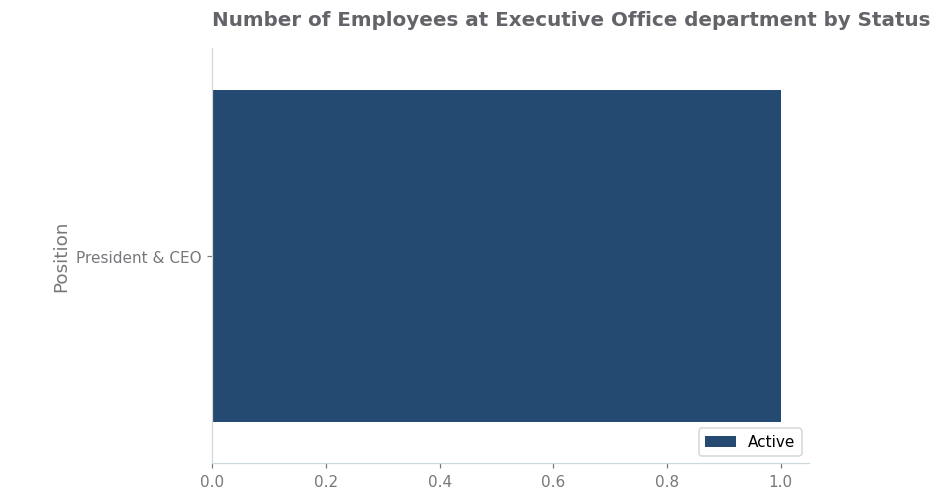

In [ ]:
## Fazendo todos os gráficos loop (com os setores por departamento)
palette1 = ['#174A7E','#4A81BF','#94B2D7','#48cae4', '#ade8f4','#caf0f8']

for department in df1['Department'].unique():
  df_sub = df1.loc[df1['Department'] == department,:]
  d3 = pd.DataFrame(df_sub[['Position','EmploymentStatus']].value_counts(),columns =['values'])


  fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(7, 5),       # (largura, altura) em polegadas 
                        dpi=110)                                   # resolução (pontos/polegada)

  ## Figura Position/department

  #dataframes:
  ## Resultados:
  sns.barplot(x=d3['values'].values, y=d3.index.get_level_values(0).values,hue=d3.index.get_level_values(1).values,palette = palette1, data = d1,ax = ax)
  ax.set_ylabel('Position',color='#76787B',fontsize=12)
  ax.set_title('Number of Employees at ' + department + ' department by Status', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')
  ax.legend(loc = 'lower right')
  ax.annotate(department, xy=(-0.07,-0.5),fontsize=13, color='#76787B',verticalalignment='center',horizontalalignment='right') 

  ### Geral para todos os gráficos:
  for i, ax in enumerate(fig.axes):
    ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
    ax.spines['left'].set_color('#cfd8dc')
    ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines
    if i == 2:
      ax.axis('off') 



Dos gráficos gerados, podemos perceber que:

- Production é o setor com mais empregados. 
- IT/IS tem maior número de posições.

#### Salário dos empregados pela área

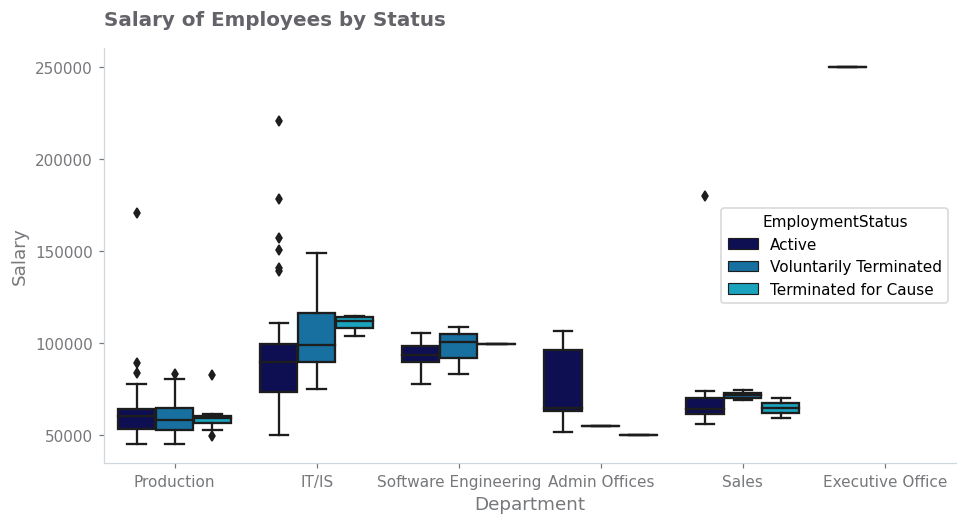

In [ ]:
# Salário por área

palette1 = ['#03045e','#0077b6','#00b4d8','#90e0ef','#03045e']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5),       # (largura, altura) em polegadas 
                      dpi=110)                                   # resolução (pontos/polegada)

sns.boxplot(x="Department", y  ='Salary',hue = 'EmploymentStatus',palette = palette1,data=df1,ax = ax)
ax.set_ylabel('Salary',color='#76787B',fontsize=12)
ax.set_xlabel('Department',color='#76787B',fontsize=12)
ax.set_title('Salary of Employees by Status', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')

### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines


Podemos obter diferentes observações pelo gráfico:

- Salário mais alto: Executive Office

- Produção: Os salários de quem ainda trabalha e quem saiu da empresa são parecidos. Poucos fucionários ativos recebem um pouco a mais, mas os salários são bem parecidos no setor. O IQR é pequeno. Não tem muita diferença para quem está ativo e saiu de empresa.

- IT/IS: Alguns funcionários específicos recebem um valor bem mais alto, mas existe uma diferença de salários entre os funcionários. Explica pela grande quantidade posições nesse setor. Um ponto interessante é que os funcionários que saíram por justa causa foram os com maiores salários que os outros casos.Seguido também dos que saíram por vontade própria. Os ativos são os que recebem menor valor.

Software Engineering: Salários entre funcionários variam pouco. A mediana dos que não estão ativos é um pouco superior aos dos ativos

- Admin Offices: As pessoas que saíram do cargo (assistente administrativo) recebiam os menores salários. 

- Sales: os salários do setor de vendas não variam muito entre os funcionários (tirando o salário do diretor de vendas.



#### Resultados de Pesquisa de Satisfação dos Empregados

Para medir o grau de satisfação dos funcionários foram fornecidos resultados de 2 surveys:

- EmpSatisfaction: Feito dentro da empresa
- EngagementSurvey: De uma empresa externa

<br>

As notas variam de 1 (pior) a 5 (melhor)

Quais as notas possíveis?

In [ ]:
# EmpSatisfaction: Feito dentro da empresa
df1['EmpSatisfaction'].describe()

count    311.000000
mean       3.890675
std        0.909241
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: EmpSatisfaction, dtype: float64

In [ ]:
# EngagementSurvey: De uma empresa externa - teste externo
df1['EngagementSurvey'].describe()

count    311.000000
mean       4.110000
std        0.789938
min        1.120000
25%        3.690000
50%        4.280000
75%        4.700000
max        5.000000
Name: EngagementSurvey, dtype: float64

Maior parte dos funcionários fornececeram uma nota de 3.

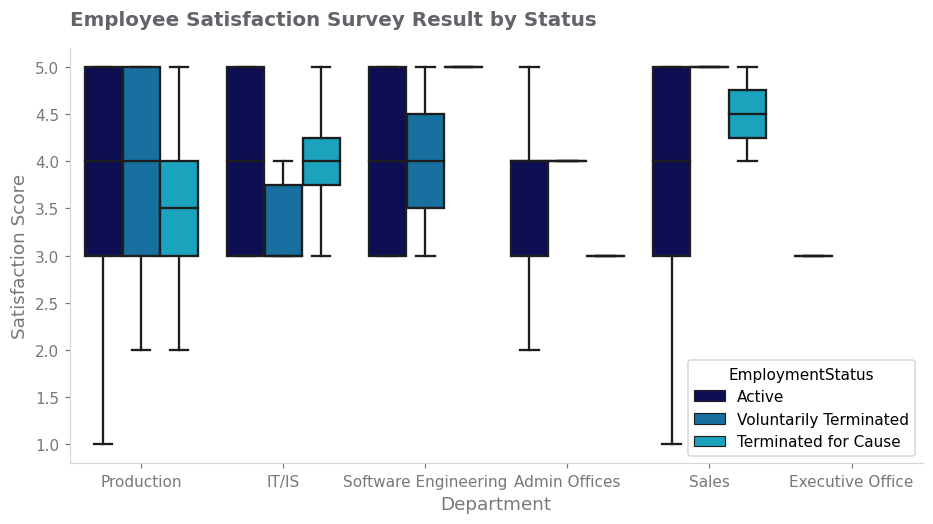

In [ ]:
# 1 - EmpSatisfaction

palette1 = ['#03045e','#0077b6','#00b4d8','#90e0ef','#03045e']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5),       # (largura, altura) em polegadas 
                      dpi=110)                                   # resolução (pontos/polegada)

sns.boxplot(x="Department", y  ='EmpSatisfaction',hue = 'EmploymentStatus',palette = palette1,data=df1,ax = ax)
ax.set_ylabel('Satisfaction Score',color='#76787B',fontsize=12)
ax.set_xlabel('Department',color='#76787B',fontsize=12)
ax.set_title('Employee Satisfaction Survey Result by Status', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')

### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines

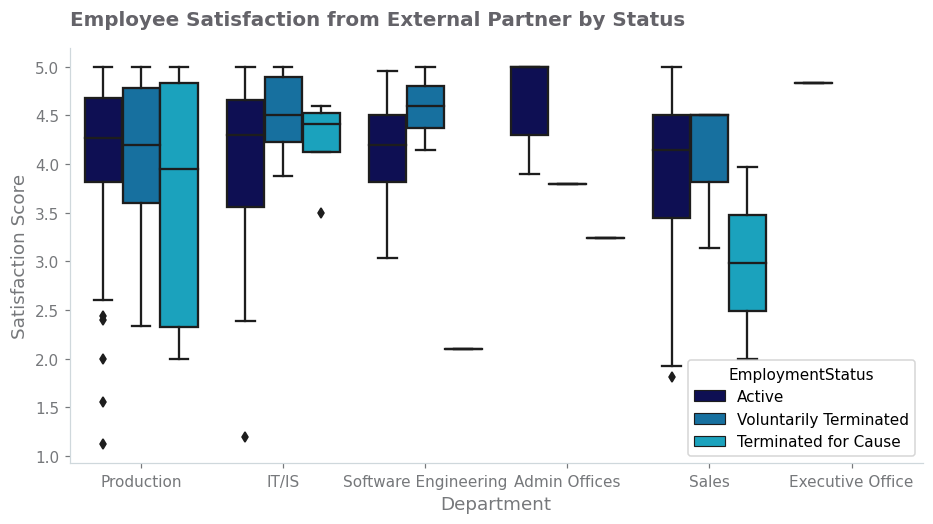

In [ ]:
# 2 - EngagementSurvey

palette1 = ['#03045e','#0077b6','#00b4d8','#90e0ef','#03045e']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5),       # (largura, altura) em polegadas 
                      dpi=110)                                   # resolução (pontos/polegada)

sns.boxplot(x="Department", y  ='EngagementSurvey',hue = 'EmploymentStatus',palette = palette1,data=df1,ax = ax)
ax.set_ylabel('Satisfaction Score',color='#76787B',fontsize=12)
ax.set_xlabel('Department',color='#76787B',fontsize=12)
ax.set_title('Employee Satisfaction from External Partner by Status', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')

### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines

#### Resultado do Funcionário

Mede o desempenho do funcionário:

- 4: Exceeds
- 3: Fully Meets
- 2: Needs Improvement
- 1: PIP


In [ ]:
df[['PerfScoreID','PerformanceScore']].value_counts()

PerfScoreID  PerformanceScore 
3            Fully Meets          243
4            Exceeds               37
2            Needs Improvement     18
1            PIP                   13
dtype: int64

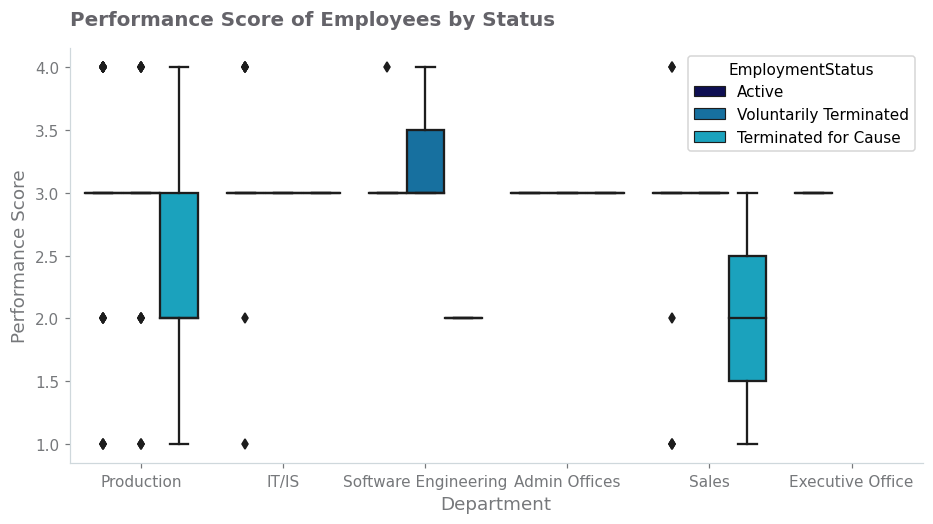

In [ ]:
# PerfScoreID

palette1 = ['#03045e','#0077b6','#00b4d8','#90e0ef','#03045e']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5),       # (largura, altura) em polegadas 
                      dpi=110)                                   # resolução (pontos/polegada)

sns.boxplot(x="Department", y  ='PerfScoreID',hue = 'EmploymentStatus',palette = palette1,data=df1,ax = ax)
#sns.pointplot(x="ManagerName_ID2", y='PerfScoreID',ci = 'sd',color = palette1[0], data=df_at,ax = ax, join=False)
ax.set_ylabel('Performance Score',color='#76787B',fontsize=12)
ax.set_xlabel('Department',color='#76787B',fontsize=12)
ax.set_title('Performance Score of Employees by Status', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')

# criando o gráfico de barras (horizontal)



### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines

OBSERVAÇÕES:

**Production:**

- Nota 3, com algumas exceções para Active e Voluntarily Terminated. Pessoas demitidas por justa causa apresentam pontuação pior como esperado.

<br>

**IT/IS:**

- Algumas notas 1, 2 e 4 que estão ativas, o restante é tudo 3 (Fully Meets). Ou seja, as pessoas demitidas ou que se demitiram neste setor, não sairam pela nota (desempenho).

<br>

**Software Engineering:**

- Interessante é que as pessoas que se demitiram tinham uma nota melhor. E como esperado, a pessoa com nota menor saiu por justa causa

<br>

**Sales:**

- Como esperado, as pessoas com nota menor sairam por justa causa





In [ ]:
df1.columns

Index(['MarriedID', 'GenderID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences', 'age_hire', 'time_company', 'ManagerName_ID2'],
      dtype='object')

#### Número de Projetos especiais que o funcionário trabalhou


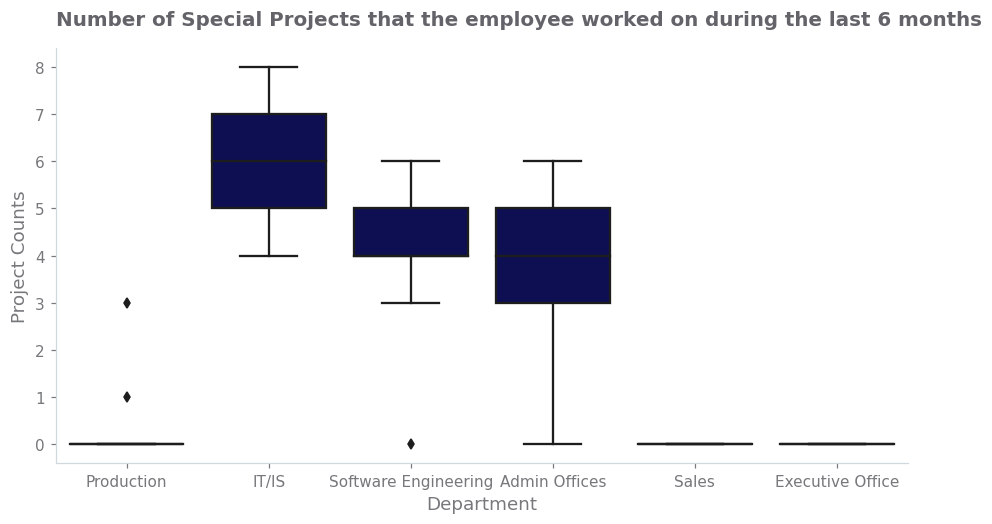

In [ ]:
# Spetial Project Count

palette1 = ['#03045e','#0077b6','#00b4d8','#90e0ef','#03045e']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5),       # (largura, altura) em polegadas 
                      dpi=110)                                   # resolução (pontos/polegada)

sns.boxplot(x="Department", y  ='SpecialProjectsCount',color = palette1[0],data=df1,ax = ax)
#sns.pointplot(x="ManagerName_ID2", y='PerfScoreID',ci = 'sd',color = palette1[0], data=df_at,ax = ax, join=False)
ax.set_ylabel('Project Counts',color='#76787B',fontsize=12)
ax.set_xlabel('Department',color='#76787B',fontsize=12)
ax.set_title('Number of Special Projects that the employee worked on during the last 6 months', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')

### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines

OBSERVAÇÕES:

- IT/IS: maior quantidade de projetos; seguido de software engineering e depois admin office. As outras áreas não tem (em geral) projetos especiais

#### Número de faltas por tempo de companhia

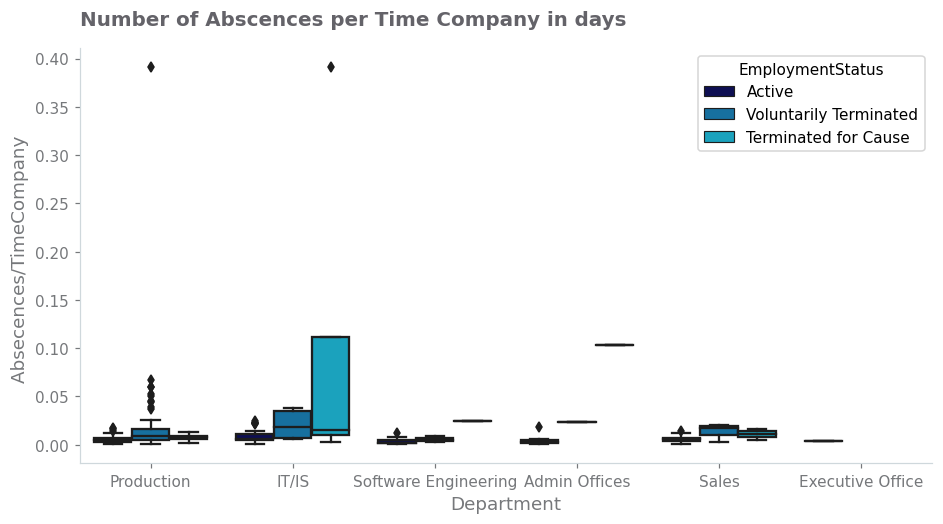

In [ ]:
# Absecences/time_company

palette1 = ['#03045e','#0077b6','#00b4d8','#90e0ef','#03045e']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5),       # (largura, altura) em polegadas 
                      dpi=110)                                   # resolução (pontos/polegada)

sns.boxplot(x="Department", y  = df1['Absences']/(365*df1['time_company']),hue = 'EmploymentStatus',palette = palette1,data=df1,ax = ax)
ax.set_ylabel('Absecences/TimeCompany ',color='#76787B',fontsize=12)
ax.set_xlabel('Department',color='#76787B',fontsize=12)
ax.set_title('Number of Abscences per Time Company in days', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')

# criando o gráfico de barras (horizontal)



### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines

IT/IS (terminated for cause) tem os maiores casos

#### Número de vezes que o funcionário estava atrasado nos últimos 30 dias

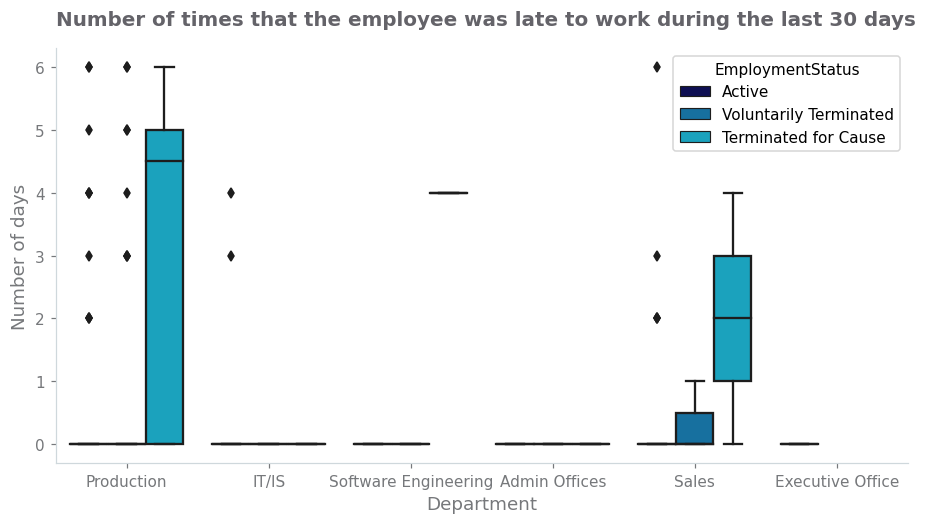

In [ ]:
palette1 = ['#03045e','#0077b6','#00b4d8','#90e0ef','#03045e']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5),       # (largura, altura) em polegadas 
                      dpi=110)                                   # resolução (pontos/polegada)

sns.boxplot(x="Department", y  = 'DaysLateLast30',hue = 'EmploymentStatus',palette = palette1,data=df1,ax = ax)
ax.set_ylabel('Number of days',color='#76787B',fontsize=12)
ax.set_xlabel('Department',color='#76787B',fontsize=12)
ax.set_title('Number of times that the employee was late to work during the last 30 days', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')

### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines

Relação direta entre demissão por justa causa e maiores número de vezes que o funcionário estava atrasado. Notar que isso ocorre bastante no departamento de produção, Software engineering tem um caso e sales tem alguns casos também.

#### Idade dos funcionários quando foram contratados

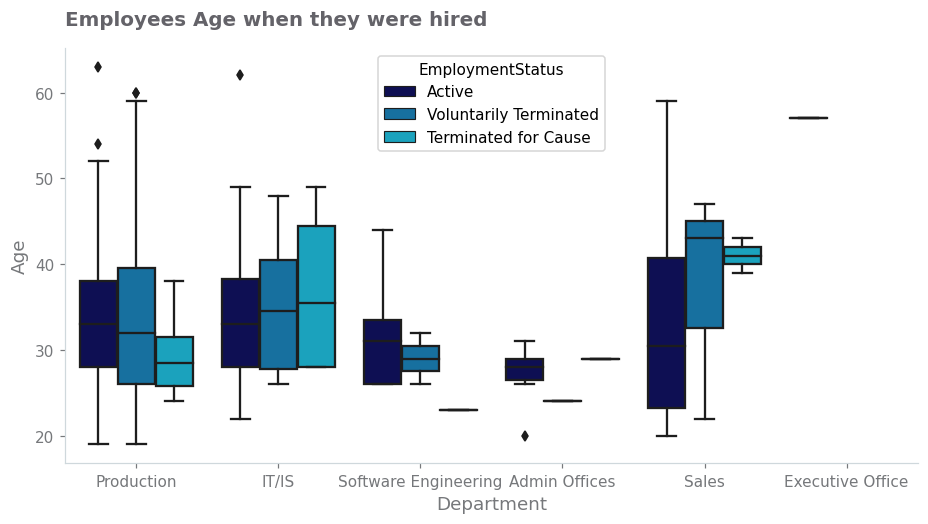

In [ ]:
# Hire age

palette1 = ['#03045e','#0077b6','#00b4d8','#90e0ef','#03045e']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5),       # (largura, altura) em polegadas 
                      dpi=110)                                   # resolução (pontos/polegada)

sns.boxplot(x="Department", y  = 'age_hire',hue = 'EmploymentStatus',palette = palette1,data=df1,ax = ax)
#sns.pointplot(x="ManagerName_ID2", y='PerfScoreID',ci = 'sd',color = palette1[0], data=df_at,ax = ax, join=False)
ax.set_ylabel('Age',color='#76787B',fontsize=12)
ax.set_xlabel('Department',color='#76787B',fontsize=12)
ax.set_title('Employees Age when they were hired', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')

# criando o gráfico de barras (horizontal)



### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines

#### Tempo de empresa dos funcionários

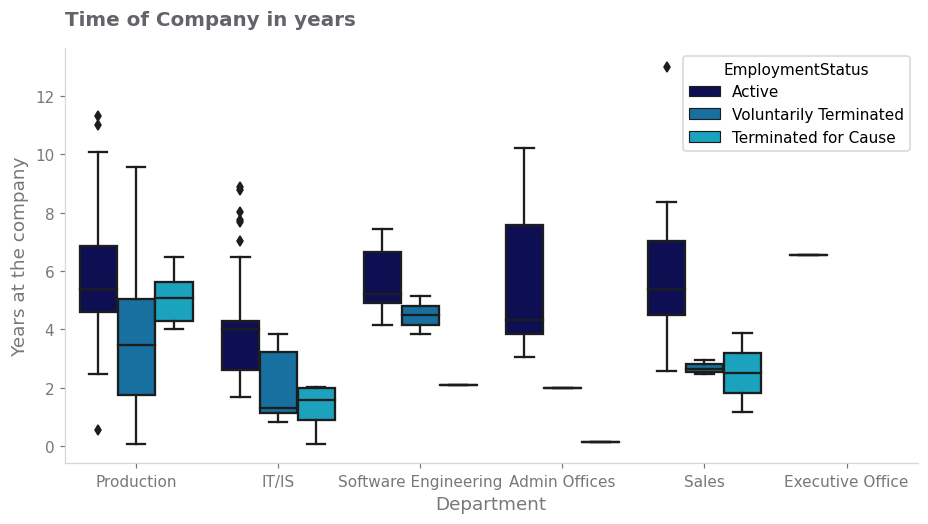

In [ ]:
# time_company

palette1 = ['#03045e','#0077b6','#00b4d8','#90e0ef','#03045e']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5),       # (largura, altura) em polegadas 
                      dpi=110)                                   # resolução (pontos/polegada)

sns.boxplot(x="Department", y  = 'time_company',hue = 'EmploymentStatus',palette = palette1,data=df1,ax = ax)
#sns.pointplot(x="ManagerName_ID2", y='PerfScoreID',ci = 'sd',color = palette1[0], data=df_at,ax = ax, join=False)
ax.set_ylabel('Years at the company',color='#76787B',fontsize=12)
ax.set_xlabel('Department',color='#76787B',fontsize=12)
ax.set_title('Time of Company in years', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')

# criando o gráfico de barras (horizontal)



### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines

#### Qual a fonte de recrutamento dos funcionários?

In [ ]:
d0 = pd.DataFrame(df1[['RecruitmentSource']].value_counts(),columns =['values'])
d0

,values
RecruitmentSource,
Indeed,87
LinkedIn,76
Google Search,49
Employee Referral,31
Diversity Job Fair,29
CareerBuilder,23
Website,13
Other,2
On-line Web application,1


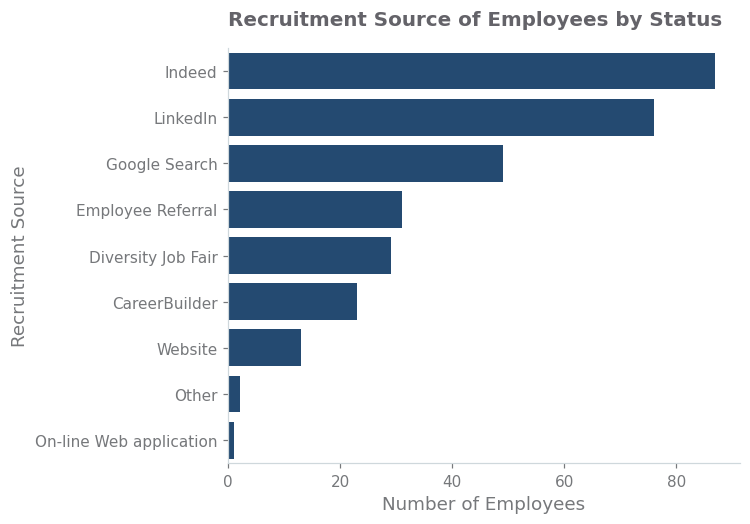

In [ ]:
# RecruitmentSource

palette1 = ['#174A7E','#4A81BF','#94B2D7','#48cae4', '#ade8f4','#caf0f8']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(6, 5),       # (largura, altura) em polegadas 
                      dpi=110)                                   # resolução (pontos/polegada)

sns.barplot(y=d0.index.get_level_values(0).values, x=d0['values'].values, color = palette1[0], ax = ax, ci=None)
ax.set_ylabel('Recruitment Source',color='#76787B',fontsize=12)
ax.set_xlabel('Number of Employees',color='#76787B',fontsize=12)
ax.set_title('Recruitment Source of Employees by Status', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')

# criando o gráfico de barras (horizontal)



### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines

In [ ]:
# Recrutment Source
d1 = pd.DataFrame(df1[['RecruitmentSource','EmploymentStatus']].value_counts(),columns =['values'])
d1

values
RecruitmentSource       EmploymentStatus              
Indeed                  Active                      66
LinkedIn                Active                      58
Employee Referral       Active                      26
Google Search           Voluntarily Terminated      25
                        Active                      19
Indeed                  Voluntarily Terminated      17
Diversity Job Fair      Voluntarily Terminated      16
LinkedIn                Voluntarily Terminated      15
Diversity Job Fair      Active                      13
Website                 Active                      12
CareerBuilder           Active                      12
                        Voluntarily Terminated      10
Google Search           Terminated for Cause         5
Indeed                  Terminated for Cause         4
LinkedIn                Terminated for Cause         3
Employee Referral       Terminated for Cause         3
                        Voluntarily Terminated       2
On-line Web application Voluntarily Terminated       1
Other                   Active                       1
                        Voluntarily Terminated       1
CareerBuilder           Terminated for Cause         1
Website                 Voluntarily Terminated       1

##### Se queremos que o empregado continue na empresa:

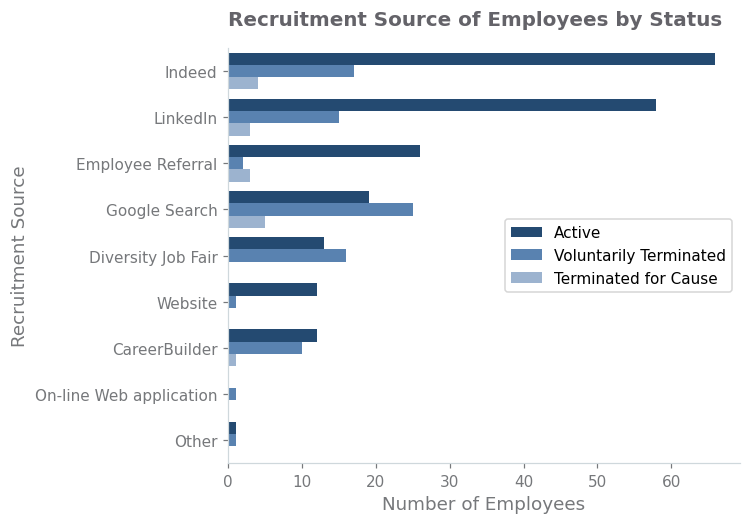

In [ ]:
# RecruitmentSource

palette1 = ['#174A7E','#4A81BF','#94B2D7','#48cae4', '#ade8f4','#caf0f8']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(6, 5),       # (largura, altura) em polegadas 
                      dpi=110)                                   # resolução (pontos/polegada)

sns.barplot(y=d1.index.get_level_values(0).values, x=d1['values'].values, hue = d1.index.get_level_values(1).values, palette = palette1, ax = ax, ci=None)
ax.set_ylabel('Recruitment Source',color='#76787B',fontsize=12)
ax.set_xlabel('Number of Employees',color='#76787B',fontsize=12)
ax.set_title('Recruitment Source of Employees by Status', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')

# criando o gráfico de barras (horizontal)



### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines

Percebe-se que as melhores fontes de recrutamente são Indeed e LinkedIn, considerando a quantidade de funcionários ativos e o relativo número baixo de funcionários não mais na empresa. Uma outra fonte muito interessante é por referência. Podemos nortar que o número de demissões é bem baixo nesses casos.

No entanto, percebe-se que busca no google e na feira de trabalhos não parece ser uma fonte de recrutamento muito interessante. O número de funcionários que se demitiram é superior ao número de funcionários ativos.

##### Se queremos que a melhor performance

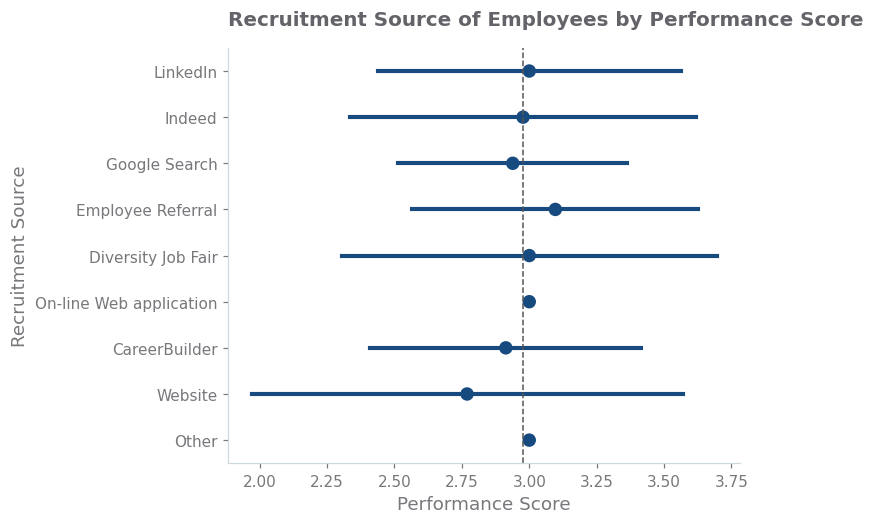

In [ ]:
# RecruitmentSource

palette1 = ['#174A7E','#4A81BF','#94B2D7','#48cae4', '#ade8f4','#caf0f8']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(6, 5),       # (largura, altura) em polegadas 
                      dpi=110)                                   # resolução (pontos/polegada)

sns.pointplot(x="PerfScoreID", y='RecruitmentSource',ci = 'sd',color = palette1[0], data=df1,ax = ax, join=False)

#sns.barplot(y=d1.index.get_level_values(0).values, x=d1['values'].values, hue=d1.index.get_level_values(1).values,palette = palette1, ax = ax)
ax.set_ylabel('Recruitment Source',color='#76787B',fontsize=12)
ax.set_xlabel('Performance Score',color='#76787B',fontsize=12)
ax.set_title('Recruitment Source of Employees by Performance Score', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')

# criando o gráfico de barras (horizontal)

# Adicionando linha para indicar a média de gorjeta dada
ax.axvline(x = df1['PerfScoreID'].mean(), color='#555655', linestyle='--',linewidth = 1)

### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines

Pensando na  nota de perfornace, qual é a melhor fonte de recutamento?

- employee referral: melhor média 

E a pior?

- website: Pior média e o desvio padrão muito alto. 


#### Quantas pessoas foram contratadas durante os anos?

In [ ]:
# quantas pessoas foram contradas durante o tempo
d1 = pd.DataFrame(df1[['DateofHire','EmploymentStatus']].value_counts(),columns =['values'])
d1['EmploymentStatus'] = d1.index.get_level_values(1).values
d1

,,values,EmploymentStatus
DateofHire,EmploymentStatus,,
2015-03-30,Active,11,Active
2014-09-29,Active,10,Active
2011-01-10,Voluntarily Terminated,9,Voluntarily Terminated
2011-05-16,Voluntarily Terminated,9,Voluntarily Terminated
2014-11-10,Active,8,Active
...,...,...,...
2013-04-01,Voluntarily Terminated,1,Voluntarily Terminated
2013-05-13,Voluntarily Terminated,1,Voluntarily Terminated
2013-07-08,Voluntarily Terminated,1,Voluntarily Terminated


(732091.8, 737112.2, 0.0, 13.0)

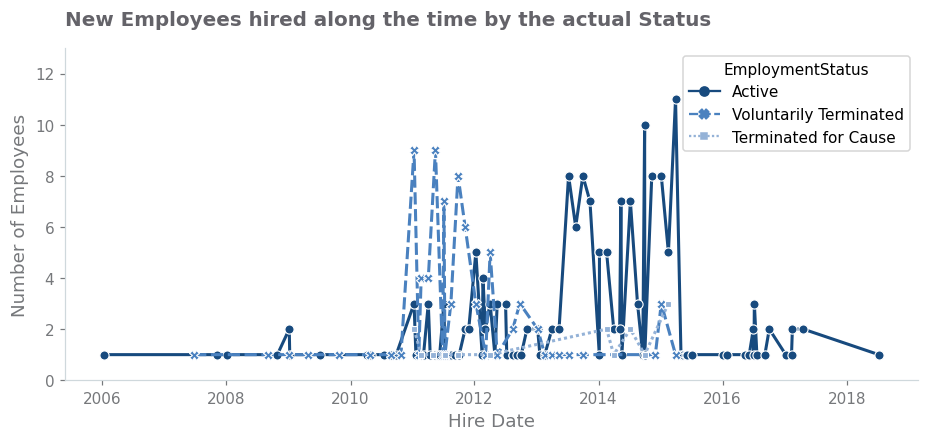

In [ ]:
# Gráfico de Linhas - Uma série temporal

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10,4),       # (largura, altura) em polegadas 
                       dpi=110)

sns.lineplot(x = d1.index.get_level_values(0).values, y = 'values',hue="EmploymentStatus",style="EmploymentStatus",markers=True, dashes=True, data = d1,  palette = palette1[0:3], lw = 2,ax=ax)

ax.set_ylabel('Number of Employees',color='#76787B',fontsize=12)
ax.set_xlabel('Hire Date',color='#76787B',fontsize=12)
ax.set_title('New Employees hired along the time by the actual Status', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')

### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines

# 7 - Modificar o limite de y para começar do 0
ax.axis(ymin=0,ymax=d1['values'].max()+2)



Temos 2 períodos de contratação. 

- 2010 - 2012 : muitos funcionários foram contratados e posteriormente pediram demissão.

- 2013 - 2015: Ainda um número maior de funcionários foram contratados e continuam ativos.

### 3.3 Por que as pessoas saíram da companhia?


In [ ]:
# filtrando por funcionários não ativos:
df1_1 = df1.query('EmploymentStatus != "Active"')
df1_1.head(2)


NameError: ignored

In [ ]:
# total de funcionários que não fazem mais parte da companhia (104)
df1_1.shape

(104, 34)

#### Motivos de desligamento considerando o status do funcionário

In [ ]:
# Recrutment Source
d1 = pd.DataFrame(df1_1[['TermReason','EmploymentStatus']].value_counts(),columns =['values'])
d1

,,values
TermReason,EmploymentStatus,
Another position,Voluntarily Terminated,20
unhappy,Voluntarily Terminated,14
more money,Voluntarily Terminated,11
career change,Voluntarily Terminated,9
hours,Voluntarily Terminated,8
attendance,Terminated for Cause,6
return to school,Voluntarily Terminated,5
relocation out of area,Voluntarily Terminated,5
retiring,Voluntarily Terminated,4


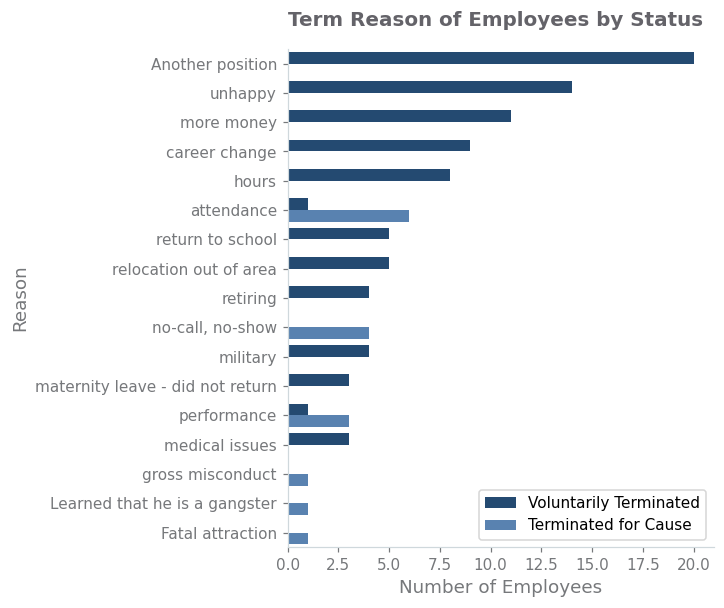

In [ ]:
# TermReason	

palette1 = ['#174A7E','#4A81BF','#94B2D7','#48cae4', '#ade8f4','#caf0f8']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(5, 6),       # (largura, altura) em polegadas 
                      dpi=110)                                   # resolução (pontos/polegada)

sns.barplot(y=d1.index.get_level_values(0).values, x=d1['values'].values, hue=d1.index.get_level_values(1).values,palette = palette1, ax = ax)
ax.set_ylabel('Reason',color='#76787B',fontsize=12)
ax.set_xlabel('Number of Employees',color='#76787B',fontsize=12)
ax.set_title('Term Reason of Employees by Status', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')

# criando o gráfico de barras (horizontal)

### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines

Principais motivos:

- Demissão voluntária:
  - outro emprego
  - infeliz com o emprego
  - mais dinheiro

- Demissão por justa causa:
  - falta no serviço
  - não ligar, não aparecer


#### Motivos de desligamento considerando departamento

Quais departamentos mais saem funcionários? E por quais motivos?

In [ ]:
# Recrutment Source
d1 = pd.DataFrame(df1_1[['TermReason','Department']].value_counts(),columns =['values'])
d1

,,values
TermReason,Department,
Another position,Production,17
unhappy,Production,14
more money,Production,11
career change,Production,6
hours,Production,6
attendance,Production,5
return to school,Production,5
military,Production,4
retiring,Production,4


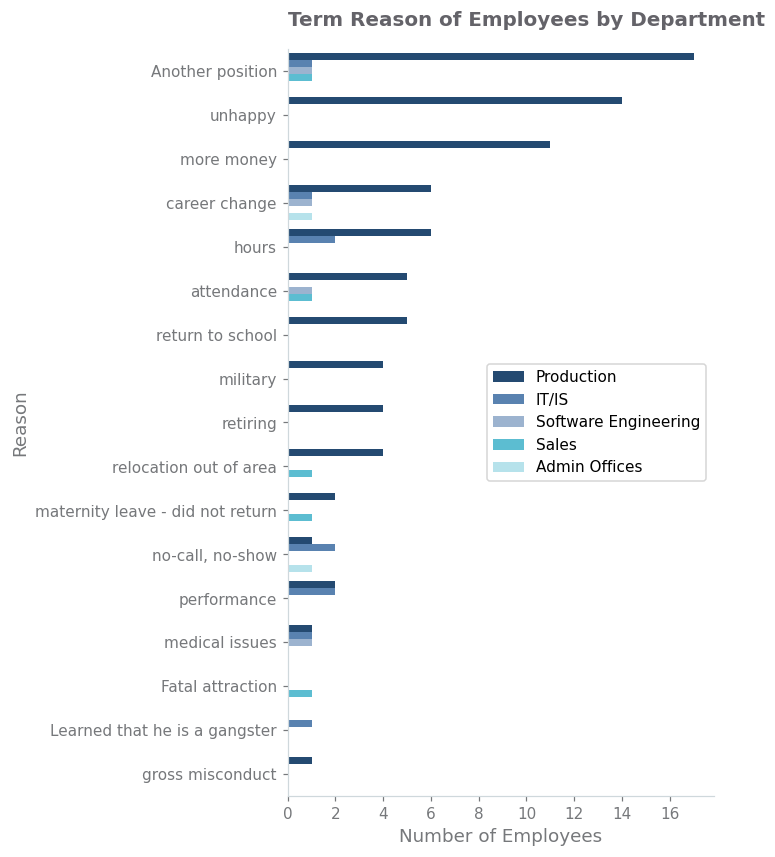

In [ ]:
# RecruitmentSource

palette1 = ['#174A7E','#4A81BF','#94B2D7','#48cae4', '#ade8f4','#caf0f8']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(5,9),       # (largura, altura) em polegadas 
                      dpi=110)                                   # resolução (pontos/polegada)


sns.barplot(y=d1.index.get_level_values(0).values, x=d1['values'].values, hue=d1.index.get_level_values(1).values,palette = palette1, ax = ax)
ax.set_ylabel('Reason',color='#76787B',fontsize=12)
ax.set_xlabel('Number of Employees',color='#76787B',fontsize=12)
ax.set_title('Term Reason of Employees by Department', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')

# criando o gráfico de barras (horizontal)

### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines

Não parece ter nenhum comportamento diferente quando fazemos a análise por departamento

#### Motivos de desligamento considerando os gerentes

Existe relação com os gerentes dos funcionários?

In [ ]:
# employees/manager
d1 = pd.DataFrame(df1_1[['ManagerName_ID2','Department']].value_counts().sort_index(),columns =['values'])
d1

,,values
ManagerName_ID2,Department,
1,Production,9
2,IT/IS,8
3,Production,12
4,Production,8
5,Production,13
6,Production,13
7,Software Engineering,3
8,Production,5
9,Production,6


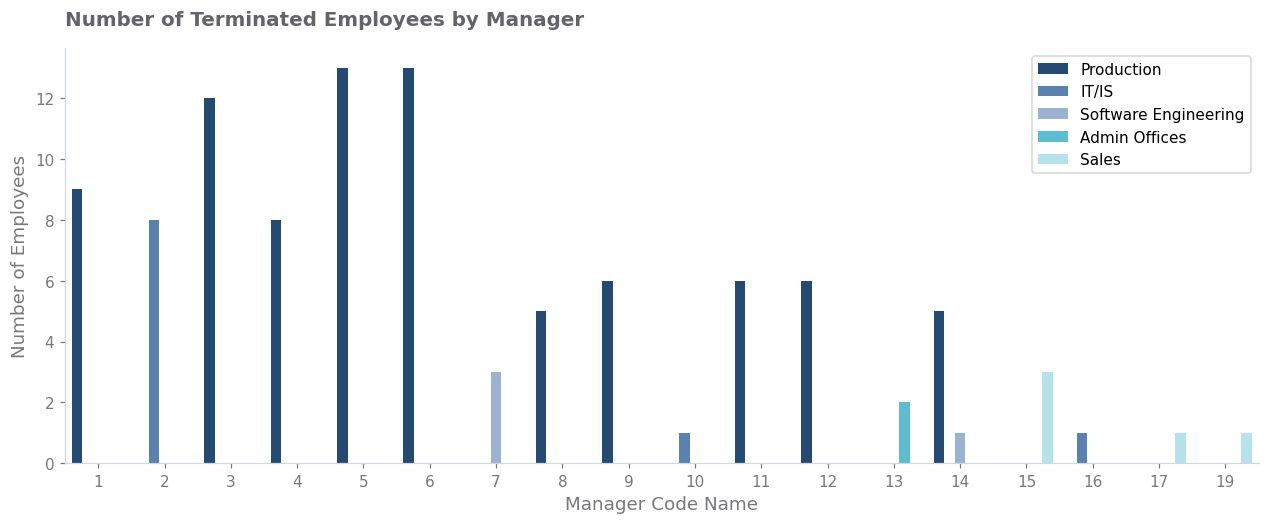

In [ ]:
palette1 = ['#174A7E','#4A81BF','#94B2D7','#48cae4', '#ade8f4','#caf0f8']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(14, 5),       # (largura, altura) em polegadas 
                      dpi=110)                                   # resolução (pontos/polegada)

## Figura Position/department

#dataframes:
## Resultados:
sns.barplot(x=d1.index.get_level_values(0), y=d1['values'].values,hue=d1.index.get_level_values(1).values, palette = palette1,data = d1,ax = ax, ci=None)
ax.set_ylabel('Number of Employees',color='#76787B',fontsize=12)
ax.set_xlabel('Manager Code Name',color='#76787B',fontsize=12)
ax.set_title('Number of Terminated Employees by Manager', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')
ax.legend(loc = 'upper right')
#ax.annotate(department, xy=(-0.07,-0.5),fontsize=13, color='#76787B',verticalalignment='center',horizontalalignment='right') 

### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines
  if i == 2:
    ax.axis('off') 

In [ ]:
# métricas gerais dos funcionários não ativos
df1_1['PerfScoreID'].describe()

count    104.000000
mean       2.884615
std        0.596229
min        1.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: PerfScoreID, dtype: float64

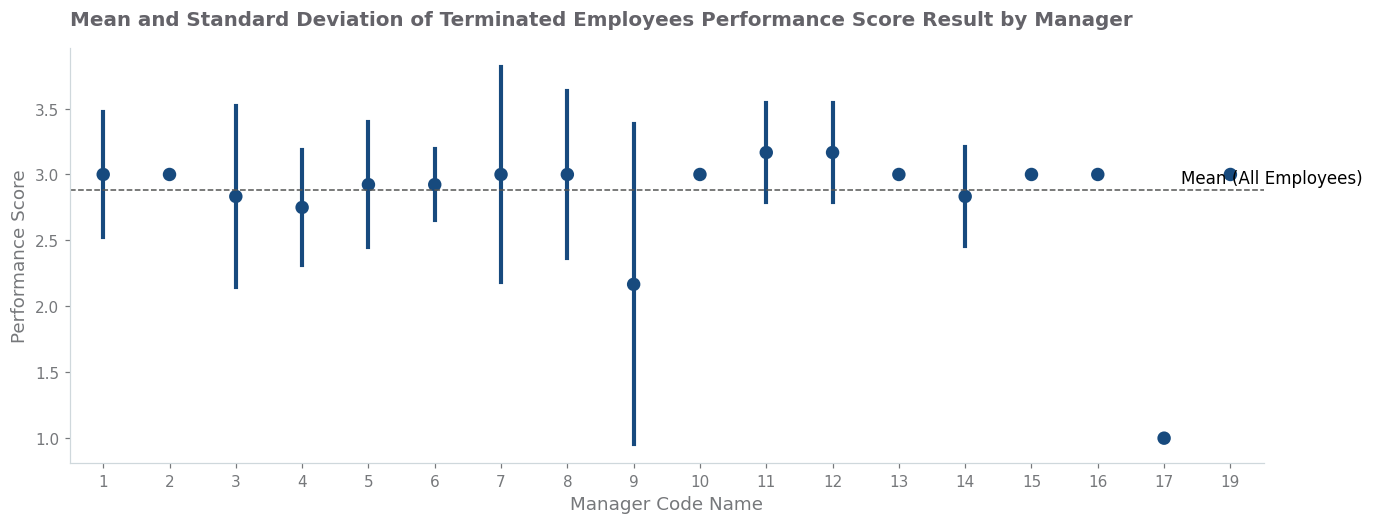

In [ ]:
palette1 = ['#174A7E','#4A81BF','#94B2D7','#48cae4', '#ade8f4','#caf0f8']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(14, 5),       # (largura, altura) em polegadas 
                      dpi=110)                                   # resolução (pontos/polegada)

sns.pointplot(x="ManagerName_ID2", y='PerfScoreID',ci = 'sd',color = palette1[0], data=df1_1,ax = ax, join=False)
ax.set_ylabel('Performance Score',color='#76787B',fontsize=12)
ax.set_xlabel('Manager Code Name',color='#76787B',fontsize=12)
ax.set_title('Mean and Standard Deviation of Terminated Employees Performance Score Result by Manager', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')


# Adicionando linha para indicar a média de gorjeta dada
ax.axhline(y = df1_1['PerfScoreID'].mean(), color='#555655', linestyle='--',linewidth = 1)

# Texto para indicar que é a média:
ax.text(df1_1["ManagerName_ID2"].max(), df1_1['PerfScoreID'].mean()+0.05,'Mean (All Employees)',color='black', fontsize=11,horizontalalignment='right')


### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines
  if i == 2:
    ax.axis('off') 

In [ ]:
pd.DataFrame(df1_1[['ManagerName','ManagerName_ID2','Department']].value_counts().sort_index(),columns =['values'])

values
ManagerName        ManagerName_ID2 Department                  
Alex Sweetwater    7               Software Engineering       3
Amy Dunn           6               Production                13
Brandon R. LeBlanc 13              Admin Offices              2
Brannon Miller     9               Production                 6
David Stanley      11              Production                 6
Debra Houlihan     19              Sales                      1
Elijiah Gray       4               Production                 8
Janet King         14              Production                 5
                                   Software Engineering       1
Jennifer Zamora    16              IT/IS                      1
John Smith         15              Sales                      3
Kelley Spirea      12              Production                 6
Ketsia Liebig      8               Production                 5
Kissy Sullivan     3               Production                12
Lynn Daneault      17              Sales                      1
Michael Albert     1               Production                 9
Peter Monroe       10              IT/IS                      1
Simon Roup         2               IT/IS                      8
Webster Butler     5               Production                13

Importante olhar para manager 9 (Brannon Miller) do departamento de produção. O gerente teve 6 funcionários desligados e as notas dos funcionários foram as mais baixas (bem abaixo na média geral).



### 3.3 Relação dos funcionários ativos e os gerentes

In [ ]:
# filtrando por funcionários ativos:
df_at = df1.query('EmploymentStatus == "Active"')
df_at.head(2)

,MarriedID,GenderID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,age_hire,time_company,ManagerName_ID2
0,0,1,4,0,62506,0,19,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,No,White,2011-07-05,NaT,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1,28,7.54,1
3,1,0,3,0,64991,0,19,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,No,White,2008-01-07,NaT,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15,19,11.00,4


In [ ]:
# how many different managers leading actual employees?
len_managers = len(df_at['ManagerName_ID2'].unique())
print(f'Total number of managers: {len_managers}')

Total number of managers: 21


How many employees/manager?

In [ ]:
## Podemos ver o número de funcionários por departamento e do nome do Manager
df_at[['ManagerName','ManagerName_ID2','Department']].value_counts()

ManagerName         ManagerName_ID2  Department          
Ketsia Liebig       8                Production              16
Kelley Spirea       12               Production              16
Brannon Miller      9                Production              16
David Stanley       11               Production              15
Elijiah Gray        4                Production              14
Peter Monroe        10               IT/IS                   13
Michael Albert      1                Production              13
Lynn Daneault       17               Sales                   12
John Smith          15               Sales                   11
Kissy Sullivan      3                Production              10
Janet King          14               Production              10
Simon Roup          2                IT/IS                    9
Webster Butler      5                Production               8
Amy Dunn            6                Production               8
Brian Champaigne    20               IT/IS    

In [ ]:
# employees/manager
d1 = pd.DataFrame(df_at[['ManagerName_ID2','Department']].value_counts().sort_index(),columns =['values'])
d1

,,values
ManagerName_ID2,Department,
1,Production,13
2,IT/IS,9
3,Production,10
4,Production,14
5,Production,8
6,Production,8
7,Software Engineering,6
8,Production,16
9,Production,16


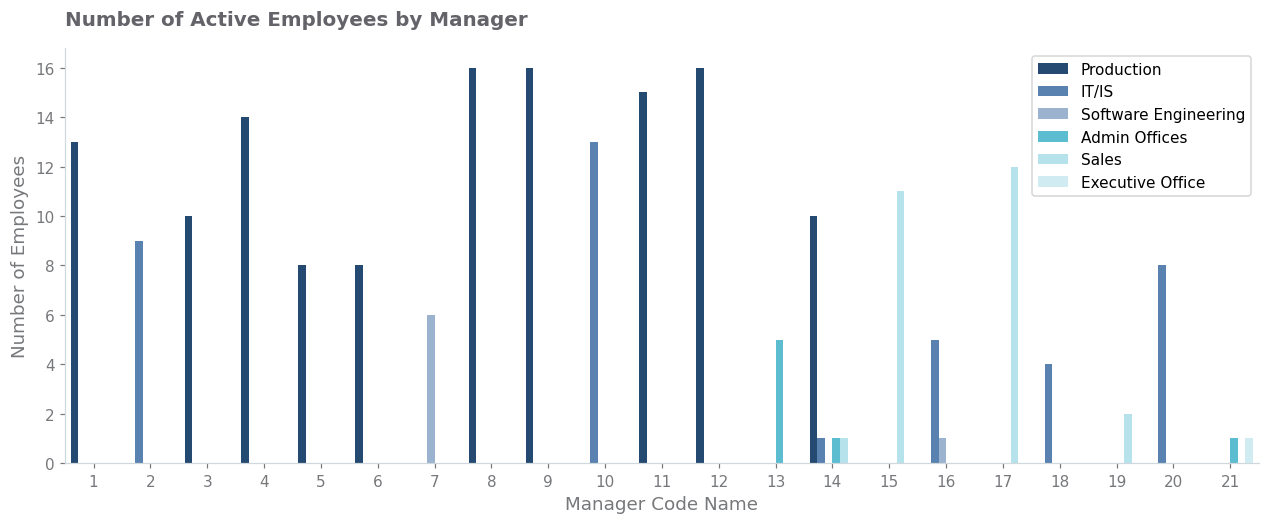

In [ ]:
palette1 = ['#174A7E','#4A81BF','#94B2D7','#48cae4', '#ade8f4','#caf0f8']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(14, 5),       # (largura, altura) em polegadas 
                      dpi=110)                                   # resolução (pontos/polegada)

## Figura Position/department

#dataframes:
## Resultados:
sns.barplot(x=d1.index.get_level_values(0), y=d1['values'].values,hue=d1.index.get_level_values(1).values, palette = palette1,data = d1,ax = ax, ci=None)
ax.set_ylabel('Number of Employees',color='#76787B',fontsize=12)
ax.set_xlabel('Manager Code Name',color='#76787B',fontsize=12)
ax.set_title('Number of Active Employees by Manager', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')
ax.legend(loc = 'upper right')


### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines
  if i == 2:
    ax.axis('off') 

In [ ]:
# Quais as notas possíveis? 'PerfScoreID'
d1 = pd.DataFrame(df_at[['PerformanceScore','PerfScoreID']].value_counts().sort_index(),columns =['values'])
d1

,,values
PerformanceScore,PerfScoreID,
Exceeds,4,29
Fully Meets,3,162
Needs Improvement,2,8
PIP,1,8


In [ ]:
# métricas gerais dos funcionários ativos
df_at['PerfScoreID'].describe()

count    207.000000
mean       3.024155
std        0.578243
min        1.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: PerfScoreID, dtype: float64

Será que existe alguma relação entre os gerentes e o Performance Score?

Fazer um gráfico que mostra a nota média dos funcionários ativos e o desvio padrão, para cada Manager:

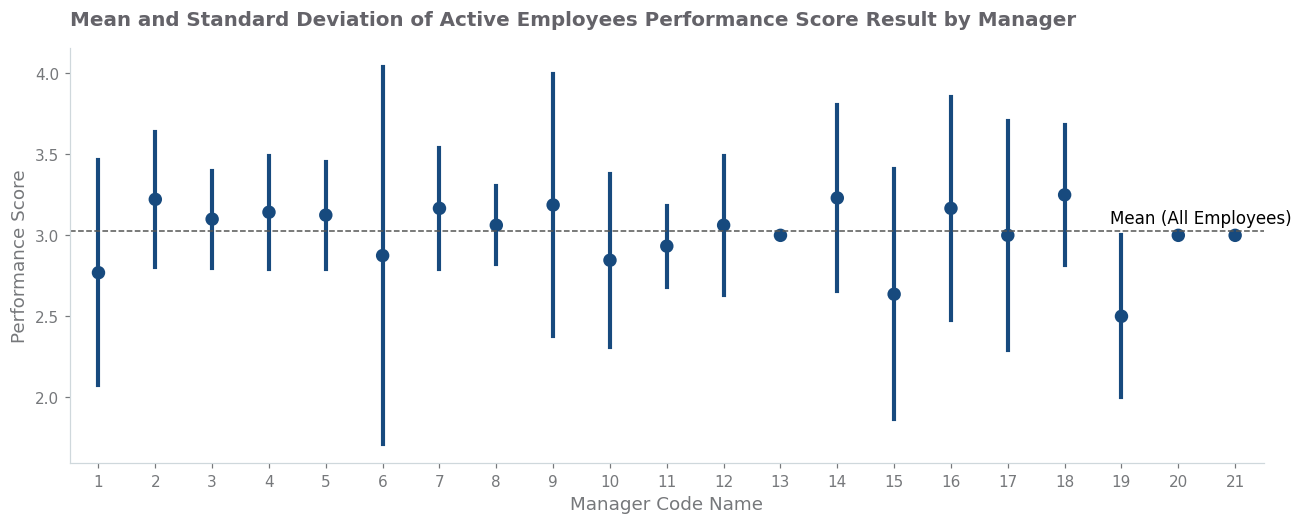

In [ ]:
palette1 = ['#174A7E','#4A81BF','#94B2D7','#48cae4', '#ade8f4','#caf0f8']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(14, 5),       # (largura, altura) em polegadas 
                      dpi=110)                                   # resolução (pontos/polegada)

sns.pointplot(x="ManagerName_ID2", y='PerfScoreID',ci = 'sd',color = palette1[0], data=df_at,ax = ax, join=False)
ax.set_ylabel('Performance Score',color='#76787B',fontsize=12)
ax.set_xlabel('Manager Code Name',color='#76787B',fontsize=12)
ax.set_title('Mean and Standard Deviation of Active Employees Performance Score Result by Manager', color = '#646369',loc='left', pad = 15, fontsize=13, weight='bold')


# Adicionando linha para indicar a média de gorjeta dada
ax.axhline(y = df_at['PerfScoreID'].mean(), color='#555655', linestyle='--',linewidth = 1)

# Texto para indicar que é a média:
ax.text(df_at["ManagerName_ID2"].max(), df_at['PerfScoreID'].mean()+0.05,'Mean (All Employees)',color='black', fontsize=11,horizontalalignment='right')


### Geral para todos os gráficos:
for i, ax in enumerate(fig.axes):
  ax.spines['right'].set_visible(False)  ## Deixar invisível os eixos superior e direito
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_color('#cfd8dc')   ## Modificar a cor dos eixos inferior e esquerdo para cinza
  ax.spines['left'].set_color('#cfd8dc')
  ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines
  if i == 2:
    ax.axis('off') 

Gerentes com resultado pior que a média geral de todos os funcionários ativos

- Michael Albert
- Amy Dunn
- Peter Monroe
- John Smith
- Debra Houlihan

Analisar porque o score dos empregados gerenciados por esses gerentes estão com o resultado inferior. 


### 3.4 Conclusões e Próximos passos

**Company Profile:**

The analyzed company is great, with more than 200 active employees. 89% of them are from Massachusetts. The company is divided into the departments: Production, Software Engineering, Admin Office, IT/IS and Sales. Most of the employees are from production and IT/IS. 

Recruitment Source of Employees :
Employees remain in the company: Indeed, LinkedIn and Website
Best mean performance score:  Employee Referral


**Employees and Managers:**
Track and monitoring managers in which their employees had a lower performance average than the general one.

Employee Referral Program:
Employee Referral is the recruitment source with the best mean performance metric. It is recommended to create programs to encourage that.
Indeed and LinkedIn are the best recruitment sources when it is expected to the employee continues at the Company.





**Classification model to predict if the employee will be terminated or not.**

1. Mapping the variables;
2. Feature Study to select the most important variables;
3. Divide in training and test set.
4.Test different supervised classification models and optimize parameters by applying cross-validation. Logistic regression, Naïve Bayes, SVM are some models that can be tested.
5. Evaluate the results with metrics, such as ROC, accuracy.

It will support the company at the decision of hire or not one new employee. 
